In [1]:
import math
import qiskit
from qiskit import IBMQ, BasicAer
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit.providers.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram

qiskit.IBMQ.load_accounts()

# backends :
# ibmqx4
# ibmqx2
# ibmq_16_melbourne
# ibmq_qasm_simulator


In [2]:
# get different backends
simulator = qiskit.providers.ibmq.least_busy(qiskit.IBMQ.backends(simulator=True))
least_busy = qiskit.providers.ibmq.least_busy(qiskit.IBMQ.backends(simulator=False))
melbourne = IBMQ.get_backend('ibmq_16_melbourne')

print("least busy:",least_busy.name())

least busy: ibmqx4


In [3]:
# helpers

# initialize circuit with n registers
def init(n):
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    qc = QuantumCircuit(q, c)
    return q, c, qc

# initialize circuit with n classical register and 14 quantum registers
def init14(n):
    q = QuantumRegister(14)
    c = ClassicalRegister(n)
    qc = QuantumCircuit(q, c)
    return q, c, qc

# controlled G(p) gate
def CG(circuit, qregister, qbit: int, ctrlbit: int, p: float):
    theta = p2theta(p)
    circuit.u3(theta / 2, 0, 0, qregister[qbit])
    circuit.cx(qregister[ctrlbit], qregister[qbit])
    circuit.u3(-theta / 2, 0, 0, qregister[qbit])
    circuit.cx(qregister[ctrlbit], qregister[qbit])
    return

# alternative design of controlled G(p)
def CGalt(circuit, qregister, qbit: int, ctrlbit: int, p: float):
    thetap = t2tp(p2theta(p))
    circuit.u3(-thetap, 0, 0, qregister[qbit])
    circuit.cx(qregister[ctrlbit], qregister[qbit])
    circuit.u3(thetap, 0, 0, qregister[qbit])

# B(p) block. Controlled G(p) followed by inverted CNOT
def B(circuit, qregister, qbit: int, ctrlbit: int, p: float):
    CG(circuit, qregister, qbit, ctrlbit, p)
    circuit.h(qregister[qbit])
    circuit.h(qregister[ctrlbit])
    circuit.cx(qregister[ctrlbit], qregister[qbit])
    circuit.h(qregister[qbit])
    circuit.h(qregister[ctrlbit])

# B(p) using alternative design of CG(p) gate
def Balt(circuit, qregister, qbit: int, ctrlbit: int, p: float):
    CGalt(circuit, qregister, qbit, ctrlbit, p)
    circuit.h(qregister[qbit])
    circuit.h(qregister[ctrlbit])
    circuit.cx(qregister[ctrlbit], qregister[qbit])
    circuit.h(qregister[qbit])
    circuit.h(qregister[ctrlbit])

# get theta angle from p for the U3 rotation inside CG(p)
def p2theta(p: float):
    return math.acos(math.sqrt(p)) * 2

# get theta' angle from theta for the U3 rotation inside CGalt(p)
def t2tp(theta:float):
    return math.asin(math.cos(theta / 2))

# run circuit on Melbourne device
def run(circuit, shots: int =1024):
    job = qiskit.execute(circuit , melbourne, shots=shots)
    return job.result().get_counts()

# run circuit on least busy device
def runFast(circuit, shots: int =1024):
    job = qiskit.execute(circuit , least_busy, shots=shots)
    print( job.result().get_counts() )

# run circuit on QASM simulator
def simulate(circuit, shots: int =1024):
    job = qiskit.execute(circuit , backend=simulator, shots=shots)
    return job.result().get_counts()

In [7]:
# W2

# 30% d'erreur en moins comparé au même circuit définit sur 2 qbits (donc placement automatique sur la machine)
# mais |00> est déjà très présent (~8% des résultats)

q, c, qc = init14(2)
qc.x(q[9])

CG(qc, q, 10, 9, 0.5)
qc.h(q[9])
qc.h(q[10])
qc.cx(q[9], q[10])
qc.h(q[9])
qc.h(q[10])

qc.measure(q[9], c[0])
qc.measure(q[10], c[1])
qc.draw()

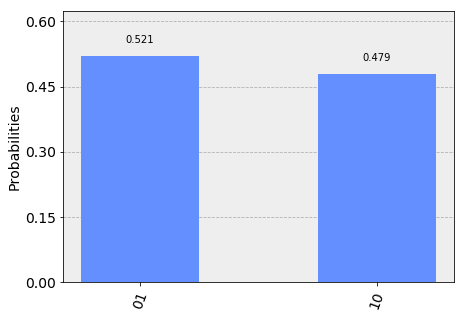

In [8]:
plot_histogram(simulate(qc))

In [10]:
plot_histogram(run(qc, shots = 8192))

Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}


JobError: "{'status': 400, 'message': 'Generic error', 'code': 'GENERIC_ERROR'}"

In [11]:
# W3

q, c, qc = init14(3)

qc.x(q[12])
Balt(qc, q, 2, 12, 1/3)
Balt(qc, q, 3, 2, 0.5)

qc.barrier()

qc.measure(q[12], c[0])
qc.measure(q[3], c[1])
qc.measure(q[2], c[2])
qc.draw()

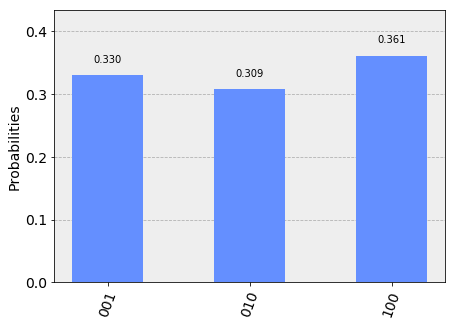

In [12]:
plot_histogram(simulate(qc))

In [13]:
plot_histogram(run(qc))

Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}
Got a 400 code response to /api/Jobs: {"error":{"status":400,"message":"Generic error","code":"GENERIC_ERROR"}}


JobError: "{'status': 400, 'message': 'Generic error', 'code': 'GENERIC_ERROR'}"

In [ ]:
# W4

q, c, qc = init14(4)
qc.x(q[5])

Balt(qc, q, 9, 5, 0.5)
Balt(qc, q, 6, 5, 0.5)
Balt(qc, q, 10, 9, 0.5)

qc.barrier()

qc.measure(q[5], c[0])
qc.measure(q[6], c[1])
qc.measure(q[9], c[2])
qc.measure(q[10], c[3])

qc.draw()

In [ ]:
plot_histogram(simulate(qc))

In [ ]:
plot_histogram(run(qc))

In [ ]:
# W6

q, c, qc = init14(6)
qc.x(q[5])

Balt(qc, q, 9, 5, 0.5)
Balt(qc, q, 4, 5, 2/3)
Balt(qc, q, 10, 9, 2/3)
Balt(qc, q, 6, 5, 0.5)
Balt(qc, q, 8, 9, 0.5)

qc.measure(q[5], c[0])
qc.measure(q[6], c[1])
qc.measure(q[9], c[2])
qc.measure(q[10], c[3])
qc.measure(q[4], c[4])
qc.measure(q[8], c[5])

simulate(qc, shots = 8192)

In [ ]:
plot_histogram(run(qc, shots = 8192), figsize=(30,12))

In [ ]:
# naive W14

q, c, qc = init(14)
qc.x(q[0])

B(qc, q, 7, 0, 0.5)
B(qc, q, 4, 0, 4/7)
B(qc, q, 2, 0, 0.5)
B(qc, q, 1, 0, 0.5)
B(qc, q, 3, 2, 0.5)
B(qc, q, 5, 4, 1/3)
B(qc, q, 6, 5, 0.5)
B(qc, q, 11, 7, 4/7)
B(qc, q, 9, 7, 0.5)
B(qc, q, 8, 7, 0.5)
B(qc, q, 10, 9, 0.5)
B(qc, q, 12, 11, 1/3)
B(qc, q, 13, 12, 0.5)


qc.measure(q, c)

In [ ]:
plot_histogram(simulate(qc))